In [4]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import cv2
from sklearn.externals import joblib
from skimage.external import tifffile

In [21]:
def getBigTrainMask():
    data = tifffile.imread("/Users/xuyameng/Desktop/biaozhu/LC08_L1TP_121038_20141024_20170418_01_T1_merge.tif")
    mask = cv2.imread("/Users/xuyameng/Desktop/biaozhu/purse_fu.png",0)
    datat,maskt = get_train_data(data,mask)
    return datat.reshape((-1,7)),maskt

In [22]:
def getAllTrainData():
    tk = getBigTrainMask()
    ts = getTrainMask()
    ztmp = np.zeros((tk[1].shape[0],))
    ppdata = np.vstack([tk[0],ts[0]])
    ppmask = np.hstack([ztmp,ts[1]])
    return ppdata,ppmask

In [23]:
def getTrainMask():
    data = tifffile.imread("/Users/xuyameng/Desktop/biaozhu/part.tif")
    print(data.shape)
    img1 = tifffile.imread("/Users/xuyameng/Downloads/cloud_epoch.tif")
    tmp  = np.zeros((img1.shape[0],img1.shape[1]))
    tmp[img1==1]=2
    res = np.zeros((img1.shape[0],img1.shape[1]))
    img2 = tifffile.imread("/Users/xuyameng/Downloads/cloud_epoch_1.tif")
    res = res+tmp
    res = res+img2
    p = np.zeros((res.shape[0],res.shape[1]))
    p[res==0]=0
    p[res==1]=1
    p[res==2]=2
    return data.reshape((-1,7)),p.reshape((-1))

In [24]:
trdata,trlabel = getAllTrainData()

(956, 963, 7)


In [2]:
imgf=cv2.imread("/Users/wanggang/Desktop/2015/shp2png/cloud_positive.png",0)
imgz=cv2.imread("/Users/wanggang/Desktop/2015/shp2png/cloud_negative.png",0)

tmpf = np.zeros((imgf.shape[0],imgf.shape[1]))
tmpf[imgf==1]=2

label = np.zeros((imgf.shape[0],imgf.shape[1]))
label=label+imgz
label=label+tmpf
#label[label==3]=1

In [3]:
np.unique(label,return_counts=True)

(array([0., 1., 2.]), array([58847088,   291029,   933484]))

In [4]:
input_image = tifffile.imread("/Users/wanggang/desktop/jianfengbiaozhu/LC81210402015156LGN00_merge.tif")
output_image = label

In [15]:
def get_train_data(input_image,output_image):
    need_label = np.zeros([output_image.shape[0],output_image.shape[1]])
    for i in range(output_image.shape[0]):
        for j in range(output_image.shape[1]):
            if output_image[i][j] != 0 and output_image[i][j]!=3:
            #if output_image[i][j] in [1,2,3,4,5,6,7,8,9]:
                need_label[i][j] = output_image[i][j]
    new_datawithlabel_list = []
    for i in range(output_image.shape[0]):
        for j in range(output_image.shape[1]):
            if need_label[i][j] != 0:
                c2l = list(input_image[i][j])
                c2l.append(need_label[i][j])
                new_datawithlabel_list.append(c2l)
    new_datawithlabel_array = np.array(new_datawithlabel_list)
    dataL = new_datawithlabel_array[:,:-1]
    labelL = new_datawithlabel_array[:,-1]
    return dataL,labelL

In [6]:
dataL,labelL = get_train_data(input_image,output_image)

In [7]:
ttlabel = np.zeros((labelL.shape[0],))

In [8]:
ttlabel[labelL==1]=0
ttlabel[labelL==2]=1

In [9]:
np.unique(ttlabel)

array([0., 1.])

In [25]:
catmodel=CatBoostClassifier(iterations=200,loss_function='MultiClass')
#catmodel =RandomForestClassifier()
catmodel.fit(trdata,trlabel)

0:	learn: -1.0523447	total: 683ms	remaining: 2m 15s
1:	learn: -1.0096264	total: 1.27s	remaining: 2m 6s
2:	learn: -0.9704431	total: 1.84s	remaining: 2m 1s
3:	learn: -0.9340028	total: 2.36s	remaining: 1m 55s
4:	learn: -0.9001850	total: 2.88s	remaining: 1m 52s
5:	learn: -0.8687705	total: 3.48s	remaining: 1m 52s
6:	learn: -0.8394083	total: 4s	remaining: 1m 50s
7:	learn: -0.8119330	total: 4.52s	remaining: 1m 48s
8:	learn: -0.7863514	total: 5.02s	remaining: 1m 46s
9:	learn: -0.7622494	total: 5.57s	remaining: 1m 45s
10:	learn: -0.7394389	total: 6.12s	remaining: 1m 45s
11:	learn: -0.7180612	total: 6.67s	remaining: 1m 44s
12:	learn: -0.6978365	total: 7.19s	remaining: 1m 43s
13:	learn: -0.6787378	total: 7.72s	remaining: 1m 42s
14:	learn: -0.6606275	total: 8.23s	remaining: 1m 41s
15:	learn: -0.6434210	total: 8.84s	remaining: 1m 41s
16:	learn: -0.6270852	total: 9.42s	remaining: 1m 41s
17:	learn: -0.6116444	total: 9.95s	remaining: 1m 40s
18:	learn: -0.5968885	total: 10.5s	remaining: 1m 39s
19:	lear

156:	learn: -0.2317845	total: 1m 26s	remaining: 23.8s
157:	learn: -0.2315264	total: 1m 27s	remaining: 23.2s
158:	learn: -0.2312913	total: 1m 27s	remaining: 22.7s
159:	learn: -0.2310673	total: 1m 28s	remaining: 22.1s
160:	learn: -0.2308059	total: 1m 29s	remaining: 21.6s
161:	learn: -0.2306102	total: 1m 29s	remaining: 21s
162:	learn: -0.2303859	total: 1m 30s	remaining: 20.5s
163:	learn: -0.2301474	total: 1m 30s	remaining: 19.9s
164:	learn: -0.2299726	total: 1m 31s	remaining: 19.4s
165:	learn: -0.2297926	total: 1m 31s	remaining: 18.8s
166:	learn: -0.2296080	total: 1m 32s	remaining: 18.2s
167:	learn: -0.2294138	total: 1m 32s	remaining: 17.7s
168:	learn: -0.2291869	total: 1m 33s	remaining: 17.1s
169:	learn: -0.2290038	total: 1m 33s	remaining: 16.6s
170:	learn: -0.2288321	total: 1m 34s	remaining: 16s
171:	learn: -0.2286623	total: 1m 34s	remaining: 15.5s
172:	learn: -0.2284468	total: 1m 35s	remaining: 14.9s
173:	learn: -0.2282489	total: 1m 36s	remaining: 14.3s
174:	learn: -0.2280615	total: 1m

In [26]:
joblib.dump(catmodel,"/Users/xuyameng/Desktop/biaozhu/hhh.m")
## chengshu.m

['/Users/xuyameng/Desktop/biaozhu/hhh.m']

### 预测

In [27]:
import matplotlib.pyplot as plt

In [28]:
cloudNet = joblib.load("/Users/xuyameng/Desktop/biaozhu/hhh.m")

In [29]:
def predict(net,tifData):
    pred = net.predict(tifData.reshape((-1,7))).reshape((tifData.shape[0],tifData.shape[1]))
    return pred

In [30]:
tifData = tifffile.imread("/Users/xuyameng/Desktop/biaozhu/LC08_L1TP_121038_20141024_20170418_01_T1_merge.tif")

In [31]:
res = predict(cloudNet,tifData)

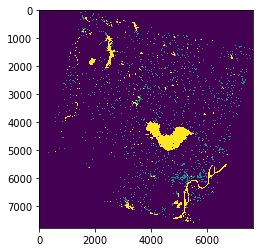

In [32]:
plt.imshow(res)

In [33]:
cv2.imwrite("/Users/xuyameng/Desktop/biaozhu/0627hhh.png",res)

True

In [29]:
tt = np.zeros((res.shape[0],res.shape[1]))

In [30]:
ff = tifffile.imread("/Users/wanggang/Desktop/0412/0412.tif")

In [31]:
ppp = np.zeros((res.shape[0],res.shape[1]))

In [32]:
ppp[ff==5]=1
ppp[ff==6]=1

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7831 but corresponding boolean dimension is 7811

In [20]:
tt[ff==5]=1
tt[ff==6]=1
tt[ff==2]=1

NameError: name 'tt' is not defined

In [34]:
cv2.imwrite("/Users/wanggang/Desktop/3c.png",ppp)

True

In [35]:
rrs = np.zeros((res.shape[0],res.shape[1]))

In [36]:
pp = res - tt

In [37]:
rrs[pp==1]=1

In [38]:
cv2.imwrite("/Users/wanggang/Desktop/frt.png",rrs)

True

Automatically created module for IPython interactive environment


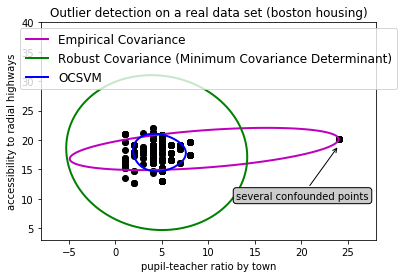

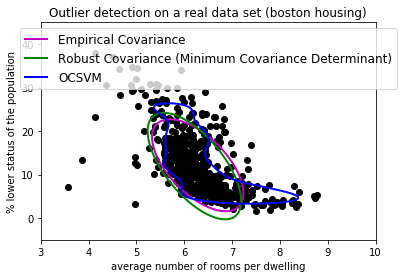

In [77]:
print(__doc__)

# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

# Get data
X1 = load_boston()['data'][:, [8, 10]]  # two clusters
X2 = load_boston()['data'][:, [5, 12]]  # "banana"-shaped

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()


预测 [-0.95804326]
40.74
-2.75


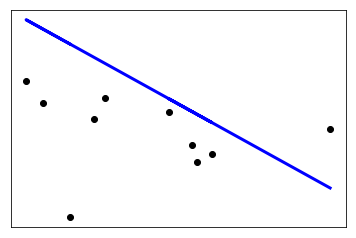

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
data=datasets.load_boston()

data_x=data.data[:,np.newaxis,12]
data_x_train=data_x[:-10]
data_x_test=data_x[-10:]
data_y_train=data.target[:-10]
data_y_test=data.target[-10:]
reg=linear_model.LinearRegression()
reg.fit(data_x_train,data_y_train)
data_y_pred=reg.predict(data_x_test)
print("预测",reg.coef_)
print("%.2f"%mean_squared_error(data_y_test,data_y_pred))
print("%.2f"%r2_score(data_y_test,data_y_pred))
plt.scatter(data_x_test,data_y_test,color='black')
plt.plot(data_x_test,data_y_pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Automatically created module for IPython interactive environment


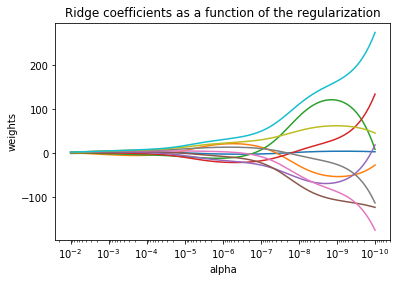

In [95]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [97]:
print(__doc__)
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets


Automatically created module for IPython interactive environment


200


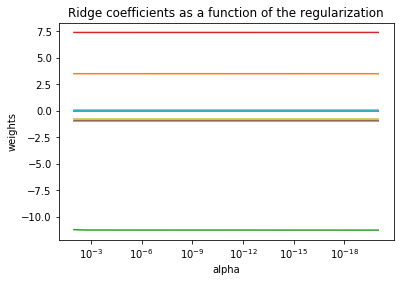

In [139]:
data=datasets.load_boston()
data_x_test=data.data[:,np.arange(2,12)]
data_y_test=data.target[:]
#print(data_x_test.shape,data_x_test)
#print(data.target)
#print(data_y_test)
n_alphas = 200
alphas = np.logspace(-20, -2, n_alphas)

coefs=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(data_x_test,data_y_test)
    coefs.append(ridge.coef_)
print(len(coefs))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(10)
(-1)**x

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1])

Automatically created module for IPython interactive environment
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.642515


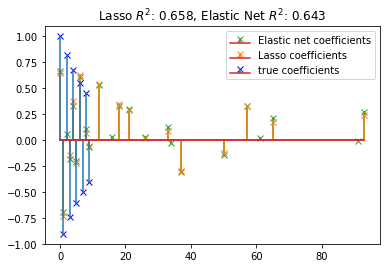

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()


In [30]:
import re

if re.match(r'.*?@.*?','mr-bob@example.com'):
    print("ok")

ok


Automatically created module for IPython interactive environment


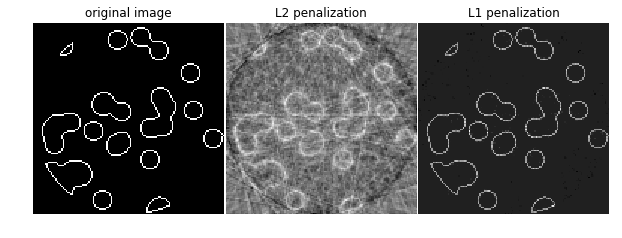

In [2]:
print(__doc__)

# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """ Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """ Synthetic binary data """
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()